## Core continuum plots

- core synage break frequency map
- core continuum images

In [ ]:
import numpy as np
import shutil
from astropy.io import ascii, fits
#from radiobs import fluxInt
#import pbCorr
#import synCl

import aplpy

from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatter 

fint = fluxInt.fluxint()
pb = pbCorr.pbcorr()
syn = synCl.synClean()

FA_radeg = 50.673825
FA_decdeg = -37.208227


BeamRa = 50.6930035
BeamDec = -37.222974

#rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'


CoreDir = rootDir+'core/'

figDir = CoreDir+'coreFigs/'

fint.rootdir = rootDir
syn.rootdir = rootDir
pb.rootdir = rootDir

outContPlot = figDir+'coreImsAAA1MF.pdf'
outSynPlot = figDir+'coreSynF8.png'
    
Meer = CoreDir+'inIms/Meer_1440MHz_pbcorr_cutCtr_bt32.fits'
VLA48 = CoreDir+'inIms/VLA_4860MHz.fits'   
VLA15 = CoreDir+'inIms/VLA_15GHz.fits'
ALMA = CoreDir+'inIms/ALMA_allGHz.fits'
MeerCv = CoreDir+'inIms/CONVL/CONVL_Meer_1440MHz_pbcorr_cutCtr_bt32.fits'

synMap = CoreDir+'synMaps/ajfix06/break.fits'

files = [Meer,VLA48,VLA15,ALMA]

#for i in xrange (0,len(files)):
    
#    files[i]=fint.cleanHead(files[i])

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


In [27]:
params = {'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 13.5,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 12,
          'ytick.labelsize'     : 12, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=synMap

fig = plt.figure(figsize=(10, 10))

f4 = aplpy.FITSFigure(a, figure=fig)

f4.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'log',
                    exponent=2,vmin=1e3,vmax=1.e7)
f4.frame.set_linewidth(3)
f4.recenter(FA_radeg,FA_decdeg,width=125./3600.,height=115./3600.)

f4.show_contour(MeerCv,levels=[1.5e-3,3e-3,6e-3,1.2e-2,2.4e-2,4.8e-2,9.6e-2], colors='black',lw=2)

#f4.set_title('Break frequency map')

f4.tick_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal') 
f4.axis_labels.set_font( weight='book',size='medium',
                        stretch='semi-expanded', family='serif', \
                         style='normal', variant='normal')
f4.tick_labels.set_xformat('hh:mm:ss')

f4.tick_labels.set_yformat('dd:mm')

f4.axis_labels.set_xtext('Ra (J2000)')
f4.axis_labels.set_ytext('Dec (J2000)')


f4.ticks.set_color('k')
f4.ticks.set_length(9)  # points
f4.ticks.set_linewidth(3)  # points
f4.ticks.set_minor_frequency(3)
f4.ticks.show()


f4.add_colorbar(log_format=True)

f4.colorbar.set_ticks([1e3,1e4,1e5,1e6,1e7])
#f4.colorbar.set_box([0.9, 0.118, 0.015, 0.765], box_orientation='vertical')

f4.colorbar.set_frame_linewidth(1)
f4.colorbar.set_pad(0.2)
f4.colorbar.set_font( weight='medium', \
                      stretch='semi-expanded', family='serif', \
                    style='normal', variant='normal',size=24)
f4.colorbar.set_axis_label_text(r'MHz')

f4.show_ellipses(BeamRa, BeamDec, 18.5/3600., 9./3600., angle=0, edgecolor='black',linewidth=2 )

f4.set_theme('publication')
fig.tight_layout(rect=(0.03,0.03,0.97,0.97))


fig.savefig(outSynPlot,format='png',overwrite=True)

IOError: File not found: /Users/maccagni/Projects/MFS/FornaxA/contData/core/synMaps/ajfix06/break.fits

<Figure size 720x720 with 0 Axes>

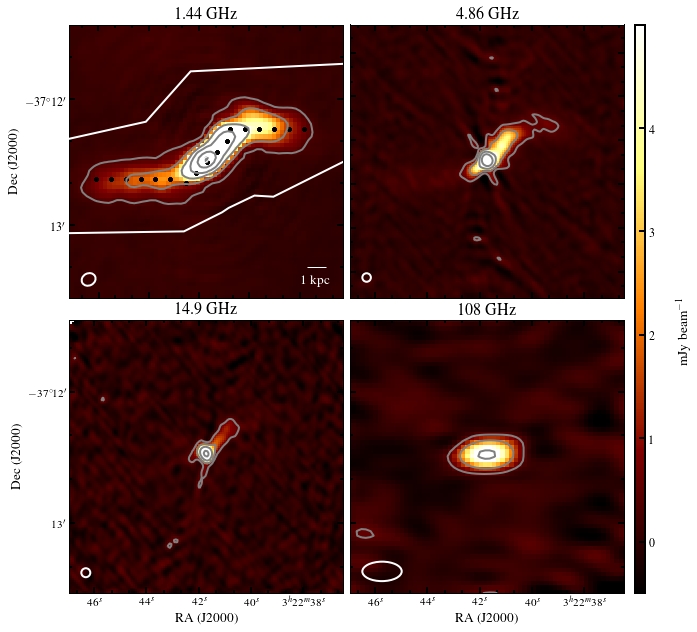

In [7]:
params = {'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 13.5,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 12,
          'ytick.labelsize'     : 12, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=files[0]
b=files[1]
c=files[2]
d=files[3]

fig = plt.figure(figsize=(10, 10))

f22 = fits.getdata(d, ext=0)
img = plt.imshow(f22*1e3, cmap="afmhot",vmin=-0.5,vmax=5.)
plt.gca().set_visible(False)
cax = plt.axes([0.905, 0.1, 0.015, 0.79])
cbar = plt.colorbar(cax=cax)
cbar.ax.yaxis.set_offset_position('left')
cbar.formatter.set_powerlimits((0, 1e-3))
cbar.set_ticks([0.0,1,2,3,4])

ax = cbar.ax
ax.text(3.8,0.5,r'mJy beam$^{-1}$',rotation=90)

f4 = aplpy.FITSFigure(d, figure=fig, subplot=[0.51,0.1,0.38,0.38])
f4.set_theme('publication')

f4.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.5e-3,vmax=5.e-3)
f4.recenter(FA_radeg,FA_decdeg,width=125./3600.,height=125./3600.)

f4.show_contour(d,levels=[5e-4,2e-3,6e-3], colors='grey',lw=1,ls='-')

f4.set_title('108 GHz')

#f4.show_colorbar()
#f4.colorbar.hide()

f4.add_beam()
f4.beam.show()
f4.beam.set_corner('bottom left')
f4.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=2)


f4.axis_labels.hide_y()
f4.tick_labels.hide_y()


f4.axis_labels.set_font( weight='book', size='medium',
                         stretch='normal', family='serif', \
                         style='normal', variant='normal')
f4.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', \
                         style='normal', variant='normal') 

f4.tick_labels.set_xformat('hh:mm:ss')

f4.tick_labels.set_yformat('dd:mm')

f4.axis_labels.set_xtext('RA (J2000)')
f4.axis_labels.set_ytext('Dec (J2000)')


f4.ticks.set_color('k')
f4.ticks.set_length(6)  # points
f4.ticks.set_linewidth(2)  # points
f4.ticks.set_minor_frequency(3)
f4.ticks.show()



#f4.add_colorbar()
#f4.colorbar.show()
#f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
#f4.colorbar.set_frame_linewidth(1)
#f4.colorbar.set_pad(0.15)
#f4.colorbar.set_font( weight='book', 
#                      stretch='normal', family='serif', 
#                      style='normal', variant='normal')
#f4.colorbar.set_axis_label_text(r'mJy beam$^{-1}$')
#f4.colorbar.set_ticks([0.1,0.2,0.5,1,2,5,10,20])


#f4.show_colorbar()
#f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
#f4.colorbar.set_frame_linewidth(1)
#f4.colorbar.set_pad(0.2)
#f4.colorbar.set_font( weight='book', \
#                      stretch='normal', family='serif', \
#                       style='normal', variant='normal')
#f4.colorbar.set_axis_label_text(r'Jy beam$^{-1}$')

#f4.show_regions(rootdir+'/regions/Fa_ll.reg')
#f4.show_regions(rootdir+'/regions/Fa_rr.reg')
#f4.show_regions(rootdir+'/regions/Fa_planck.reg')
#f4.show_regions(rootdir+'/regions/Fa_co.reg')

f5 = aplpy.FITSFigure(c, figure=fig, subplot=[0.12,0.1,0.38,0.38])
f5.set_theme('publication')

f5.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.5e-3,vmax=5.e-3)
f5.recenter(FA_radeg,FA_decdeg,width=125./3600.,height=125./3600.)

#f5.show_contour(c,levels=[0.3], colors='white',lw=2)

f5.set_title('14.9 GHz')
f5.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', \
                         style='normal', variant='normal') 
f5.axis_labels.set_font( weight='book', size='medium',
                         stretch='normal', family='serif', \
                         style='normal', variant='normal')
#f5.add_beam()
#f5.beam.show()
#f5.beam.set_corner('bottom left')
#f5.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

#f5.show_colorbar()
#f5.colorbar.hide()

f5.ticks.set_color('k')
f5.ticks.set_length(6)  # points
f5.ticks.set_linewidth(2)  # points
f5.ticks.set_minor_frequency(3)

f5.tick_labels.set_yformat('dd:mm')
f5.tick_labels.set_xformat('hh:mm:ss')
f5.ticks.show()
f5.show_ellipses(BeamRa, BeamDec, 4.1/3600., 4.1/3600., angle=0, edgecolor='white',linewidth=2 )

f5.show_contour(c,levels=[5e-4,2e-3,6e-3,1.6e-2, 5e-2,1e-1], colors='grey',lw=1,ls='-')


f6 = aplpy.FITSFigure(b, figure=fig, subplot=[0.51,0.51,0.38,0.38])
f6.set_theme('publication')

f6.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.5e-3,vmax=5.e-3)
f6.recenter(FA_radeg,FA_decdeg,width=125./3600.,height=125./3600.)
f6.show_contour(b,levels=[0.102], colors='white',lw=2)

f6.set_title('4.86 GHz')

f6.axis_labels.set_font( weight='book', size='medium',
                         stretch='normal', family='serif', \
                         style='normal', variant='normal')
f6.tick_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal') 


f6.axis_labels.hide_x()
f6.axis_labels.hide_y()
f6.tick_labels.hide_x()
f6.tick_labels.hide_y()

f6.ticks.set_color('k')
f6.ticks.set_length(6)  # points
f6.ticks.set_linewidth(2)  # points
f6.ticks.set_minor_frequency(3)
f6.ticks.show()
f6.show_ellipses(BeamRa, BeamDec, 3.9/3600., 3.9/3600., angle=0, edgecolor='white',linewidth=2 )

f6.show_contour(b,levels=[5e-4,2e-3,6e-3,1.6e-2, 5e-2,1e-1], colors='grey',lw=1,ls='-')


f7 = aplpy.FITSFigure(a, figure=fig, subplot=[0.12,0.51,0.38,0.38])
f7.set_theme('publication')

f7.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                   exponent=1.,vmin=-0.5e-3,vmax=6.e-3)
f7.recenter(FA_radeg,FA_decdeg,width=130./3600.,height=130./3600.)

f7.add_beam()
f7.beam.show()
f7.beam.set_corner('bottom left')
f7.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=2)

f7.set_title('1.44 GHz')
f7.axis_labels.set_font( weight='book', size='medium',
                         stretch='normal', family='serif', \
                         style='normal', variant='normal')
f7.axis_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal')

f7.show_regions(CoreDir+'inIms/inReg/cReg.reg')

f7.axis_labels.set_ytext('Dec (J2000)')
f7.axis_labels.hide_x()
f7.tick_labels.hide_x()
f7.tick_labels.set_style('plain')
f7.tick_labels.set_yformat('dd:mm')

f7.ticks.set_color('k')
f7.ticks.set_length(6)  # points
f7.ticks.set_linewidth(2)  # points
f7.ticks.set_minor_frequency(3)
f7.ticks.show()

#f7.show_regions(rootdir+'/regions/Fa_rr.reg')
#f7.show_regions(rootdir+'/regions/Fa_planck.reg')
#f7.show_regions(rootdir+'/regions/Fa_co.reg')



f7.show_contour(a,levels=[5e-4,2e-3,6e-3,1.6e-2, 5e-2,1e-1], colors='grey',lw=1,ls='-')


P1_RA = 50.655246
P1_DEC = -37.204028
P2_RA = 50.657683
P2_DEC=-37.204028
P3_RA = 50.660133
P3_DEC = -37.204028
P4_RA = 50.662583
P4_DEC= -37.204028
P5_RA = 50.665021
P5_DEC = -37.204028
P6_RA = 50.667467
P6_DEC= -37.204017
P7_RA = 50.669921
P7_DEC = -37.204017
P8_RA = 50.670292
P8_DEC= -37.205583
P9_RA = 50.672013
P9_DEC = -37.206964

P10_RA = 50.67375
P10_DEC = -37.208333
P11_RA = 50.675475
P11_DEC = -37.209711
P12_RA = 50.677192
P12_DEC = -37.211075
P13_RA = 50.679812
P13_DEC = -37.210575
P14_RA = 50.682254
P14_DEC = -37.210575
P15_RA = 50.684692
P15_DEC = -37.210575

P16_RA = 50.689571
P16_DEC = -37.210575
P17_RA = 50.692008
P17_DEC = -37.210569

P18_RA = 50.687133
P18_DEC = -37.210578

Ras = [P2_RA,P3_RA,P4_RA,P5_RA,P6_RA,P7_RA,P8_RA,P9_RA,P10_RA,P11_RA,P12_RA,
      P13_RA,P14_RA,P15_RA,P16_RA,P17_RA,P18_RA]

Decs = [P2_DEC,P3_DEC,P4_DEC,P5_DEC,P6_DEC,P7_DEC,P8_DEC,P9_DEC,P10_DEC,P11_DEC,P12_DEC,
      P13_DEC,P14_DEC,P15_DEC,P16_DEC,P17_DEC,P18_DEC]

f7.add_scalebar(9/3600.)
f7.scalebar.set_label('1 kpc')
f7.scalebar.set_color('white')

f7.show_markers(Ras,Decs, marker='P',edgecolor='black', facecolor= 'black',s=20)
#f7.show_markers(P1_RA,P1_DEC, marker='o',edgecolor='black')
#f7.show_markers(P1_RA,P1_DEC, marker='o',edgecolor='black')


#tmp = fits.open(a)
#tmphead=tmp[0].header
#r2 = pyregion.open(rootdir+'/regions/Fa_MWA.reg').as_imagecoord(tmphead)

#patch_list, artist_list = r2.get_mpl_patches_texts()
#for p in patch_list:
#    f7.add_patch(p)
#for t in artist_list:
#    f7.add_artist(t)

#plt.tight_layout()
fig.savefig(outContPlot,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)